<a href="https://colab.research.google.com/github/Kim-Jeong-Ju/AI_Bootcamp_Review/blob/main/Lab_2_2_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2-2. Decision Tree

 ### 간단하교 효과적인 머신러닝 툴인 Scikit-learn 패키지를 사용한 Decision Tree Tutorial
*   Classification Tree, Regression Tree
*   Random Forest, Gradient Boost

[Ref.]
*   https://scikit-learn.org/stable/modules/tree.html
*   https://scikit-learn.org/stable/modules/ensemble.html






---
## Classification Tree


### Load Diabetes Dataset from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
diabetes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/diabetes.csv')
print(diabetes.columns)
diabetes.head()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8]
print(diabetes_features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


### Split and prepare the dataset

In [ ]:
train = diabetes[:650]    # training data = 1 ~ 650번째 data
test = diabetes[650:]     # test data = 651 ~ 768번째 data

In [ ]:
x_train = np.asarray(train.drop('Outcome',1))
y_train = np.asarray(train['Outcome'])
x_test = np.asarray(test.drop('Outcome',1))
y_test = np.asarray(test['Outcome'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


### Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0) # Gini by default, random_state = 0이면 tree의 random한 요소 없이 고정하는 역할
clf.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(clf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.703


트레이닝 셋에서의 정확도는 100%이나, 테스트셋에서의 정확도는 떨어짐. 즉, overfitting 되어 새로운 데이터에 generalize가 안된다는 뜻.

#### Visualize Tree

[Ellipsis]

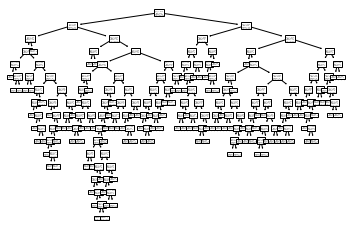

In [ ]:
tree.plot_tree(clf)
[...]

 Pre-pruning, max_depth=3 으로 설정해서 오버피팅을 방지한다. 트레이닝 셋에서의 정확도는 떨어지지만, 테스트 셋에서의 성능은 올라간다. 
 그 외에도 [post pruning with cost complexity pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)를 활용할 수 있다.

In [ ]:
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(clf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(x_test, y_test)))

Accuracy on training set: 0.783
Accuracy on test set: 0.763


[Ellipsis]

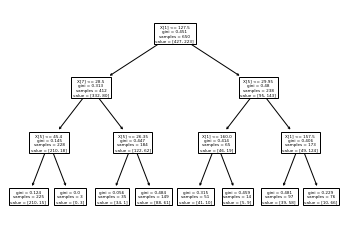

In [ ]:
tree.plot_tree(clf)
[...]

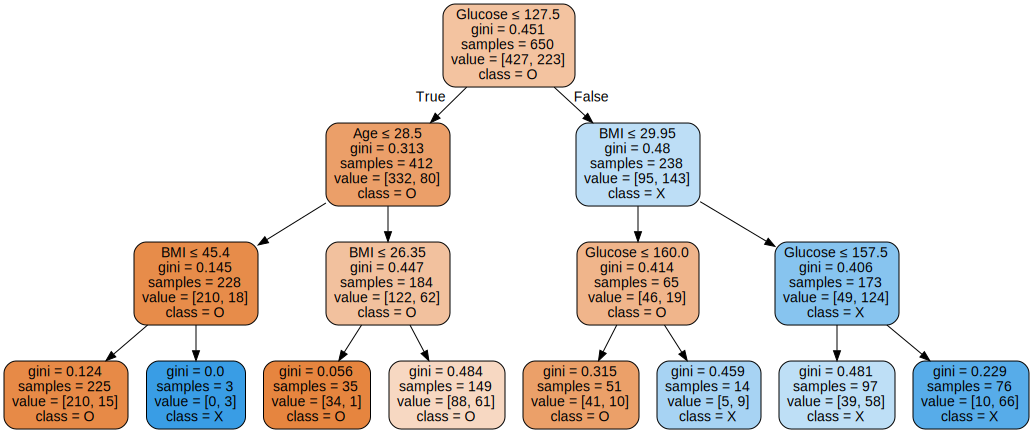

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=diabetes_features,
                     class_names=['O','X'],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### Feature importance in Decision trees
강의에서 다룬 Variable Importance Measure와 같음.
각각의 예측변수가 decision에 있어서 얼마나 중요한지 0과 1사이의 값으로 모두 합쳐서 1이 되도록 나타냄

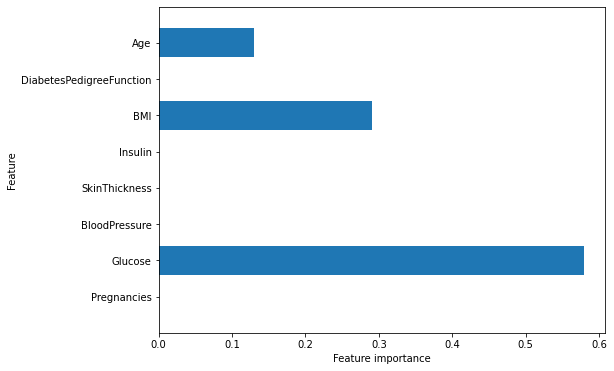

In [ ]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(clf)

### Random Forest

diabetes dataset에 100개의 트리로 구성된 Random Forest를 적용해보자.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.754


75.4%의 성능으로, Single tree 모델보다 성능이 떨어짐. 또한, Overfitting됨
따라서 max_features를 줄이고, max_depth를 준다.

In [ ]:
rf1 = RandomForestClassifier(max_features=2, max_depth=3, n_estimators=100, random_state=0)
rf1.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(x_test, y_test)))

Accuracy on training set: 0.792
Accuracy on test set: 0.771


#### Feature importance in Random Forest

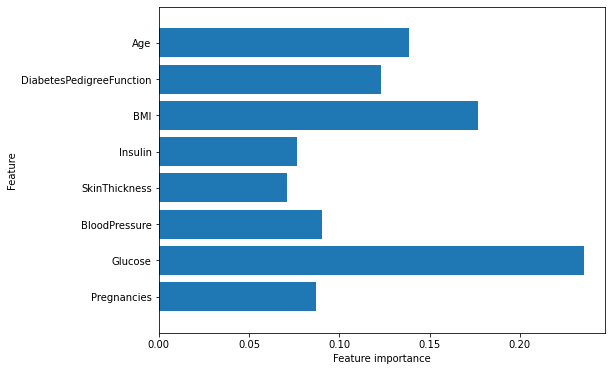

In [ ]:
plot_feature_importances_diabetes(rf)

Single tree와 마찬가지로 글루코스와 BMI의 중요도가 높음. 반면, Random forest의 randomness 때문에 더 다양한 변수들을 고려하는걸 볼 수 있다.

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(x_test, y_test)))

Accuracy on training set: 0.914
Accuracy on test set: 0.771


overfitting을 줄이기 위해서, maximum depth로 pre-pruning을 해준다.

In [ ]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=2) # by deafult 3
gb1.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(x_test, y_test)))

Accuracy on training set: 0.855
Accuracy on test set: 0.754


In [ ]:
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01) # by default 0.1
gb2.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb2.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(x_test, y_test)))

Accuracy on training set: 0.797
Accuracy on test set: 0.754


두 방법 모두 모델의 complexity를 줄이면서 training set의 성능이 test set과 가까워졌다. 그러나 test set에서의 성능이 딱히 개선되지 않았다.

#### Feature importance in Gradient Boosting

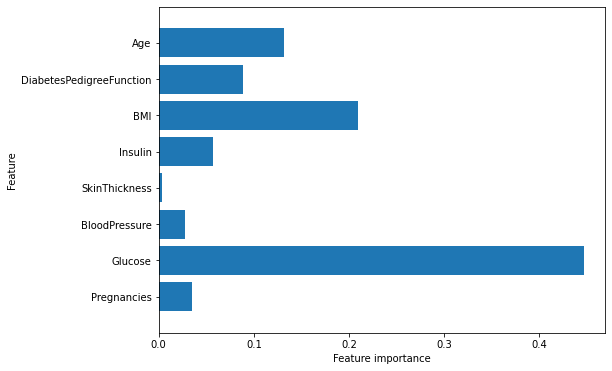

In [ ]:
plot_feature_importances_diabetes(gb1)

Random forest의 feature importance와 비슷함.



---
## Regression Tree



### Simple regression tree using synthetic data

In [ ]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [ ]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()   # ravel() = 2차원을 1차원으로 변환
y[::5] += 3 * (0.5 - rng.rand(16))    # ::5 -> index를 5의 간격으로 띄워서 본다 & noise를 삽입한다

In [ ]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [ ]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

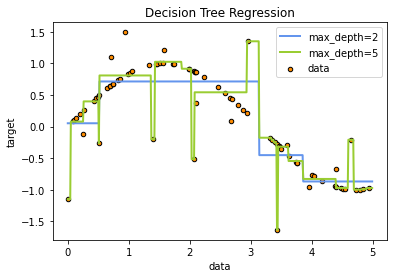

In [ ]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# max depth를 줄여 noise data들에 대해 overfitting되지 않도록 하는 것이 낫다

### Regression Tree with Tada ETA data



*   ATA: Actual Time of Arrival
*   ETA: Expected Time of Arrival
*   api_eta: 앱 API에서 예측된 ETA



In [ ]:
tada_eta = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/tada_eta.xlsx')
print(tada_eta.columns)
tada_eta.head()

NameError: ignored

In [ ]:
# pickup과 driver간의 거리를 계산하여 X100,000배로 적당히 scaling 작업
# 의미 없는 column들은 drop

tada_eta['distance'] = ((tada_eta['pickup_lat']-tada_eta['driver_lat'])**2 + (tada_eta['pickup_lng']-tada_eta['driver_lng'])**2)*100000
tada_eta = tada_eta.drop(['id', 'created_at_kst', 'driver_id', 'pickup_lng', 'pickup_lat', 'driver_lng','driver_lat','pickup_gu'],1)
tada_eta.head()

# sklearn의 tree는 범주 데이터는 다루지 못함. 이 경우에 one-hot encoding은 비효율적. 구 데이터도 활용하고 싶다면 h2o 참고

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,ATA,api_eta,month,hour,distance
0,10.60,5.65,12,0,52.400202
1,9.20,8.60,12,0,44.465889
2,10.85,10.53,12,0,149.731535
3,5.52,1.92,7,0,1.000535
4,8.60,7.10,7,0,35.014797


In [ ]:
# frac = 1이면 전체 data 갯수만큼 sampling(비복원 추출) -> 순서를 섞어주는 작업

tada_eta = tada_eta.sample(frac=1, random_state=0).reset_index(drop=True)   # 원래 코드에는 random_state X
tada_eta.head()

,ATA,api_eta,month,hour,distance
0,6.13,8.32,12,22,44.521977
1,5.37,3.05,12,11,3.989066
2,6.27,5.00,7,19,4.814699
3,10.52,8.47,12,21,77.341173
4,12.45,6.65,7,12,14.888851


In [ ]:
tada_eta.shape

(13916, 5)

In [ ]:
train = tada_eta[:12000]       # training set = 1 ~ 12,000번째 data
test = tada_eta[12000:]        # training set = 12,001 ~ 13,916번째 data

In [ ]:
x_train = np.asarray(train.drop('ATA',1))
y_train = np.asarray(train['ATA'])
x_test = np.asarray(test.drop('ATA',1))
y_test = np.asarray(test['ATA'])
eta_features = [x for i,x in enumerate(tada_eta.columns) if i!=0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
eta_features

['api_eta', 'month', 'hour', 'distance']

#### Gradient Boosting 사용

In [ ]:
params = {'n_estimators': 500,      # tree의 갯수
          'max_depth': 3,
          'min_samples_leaf': 5,
          'learning_rate': 0.05,
          'loss': 'ls'              # ls = list-squared, 'sume of squared error'와 같음
         } 

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import ensemble

In [ ]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

mae = mean_absolute_error(y_test, reg.predict(x_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


The mean squared error (MSE) on test set: 8.5198
The initial error of API ETA on test set: 13.7135
The mean absolute error (MAE) on test set: 2.0929
The initial error of API ETA on test set: 2.7047


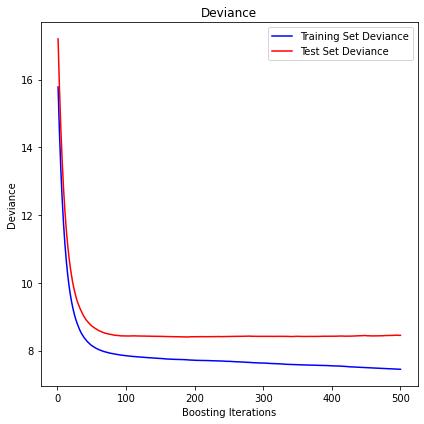

In [ ]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(x_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

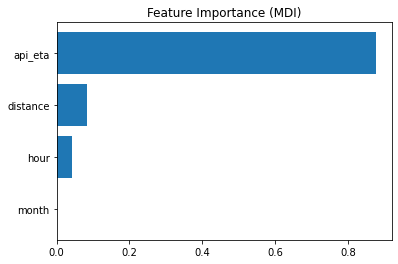

In [ ]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure()
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(eta_features)[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.show()

### HW 2: Make a better model for TADA ETA data
tree parameter를 바꾸거나, 아예 다른 알고리즘을 사용해도 됨.
트레이닝 데이터도 조작해도 되지만, 테스트셋은 조작 금지 

```
test = tada_eta[12000:]
```



[Ref.]
*   https://scikit-learn.org/stable/modules/tree.html
*   https://scikit-learn.org/stable/modules/ensemble.html


In [ ]:
# mse = mean_squared_error(y_test, reg.predict(x_test))
# print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
# print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

# mae = mean_absolute_error(y_test, reg.predict(x_test))
# print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
# print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

### ① Gradient Boosting Parameters 변경

In [ ]:
# ① Gradient Boosting Parameters 변경
reg = ensemble.GradientBoostingRegressor(
           n_estimators=300, 
           max_depth=3, 
           min_samples_leaf=100,
           learning_rate=0.03,
           max_features='sqrt',
           loss='ls',
           random_state=0
           )
reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

mae = mean_absolute_error(y_test, reg.predict(x_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

NameError: ignored

### ② RandomForestRegressor 사용

In [ ]:
# ② RandomForestRegressor 사용
reg = ensemble.RandomForestRegressor(
           n_estimators=100,  
           min_samples_leaf=1,
           max_depth=10,
           max_features='sqrt',
           criterion='mse',
           random_state=0,
           max_samples=0.07,
           ccp_alpha=0.01)
reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

mae = mean_absolute_error(y_test, reg.predict(x_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


The mean squared error (MSE) on test set: 8.4609
The initial error of API ETA on test set: 13.6675
The mean absolute error (MAE) on test set: 2.1104
The initial error of API ETA on test set: 2.6449


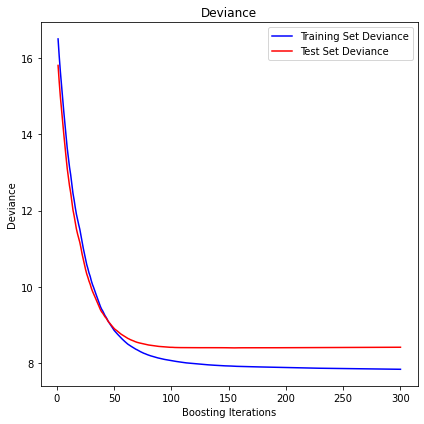

In [ ]:
params={'n_estimators': 300}
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(x_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

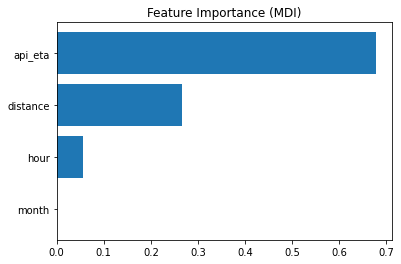

In [ ]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure()
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(eta_features)[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.show()